# Space Shuttle Challenger Disaster 
## Logistic Regression To Predict Catastrophe 

On January 28, 1986, the **Space Shuttle Challenger** broke apart **73 seconds into its flight**, killing all **seven crew members** aboard. The spacecraft disintegrated **46,000 feet (14 km) above the Atlantic Ocean**, off the coast of Cape Canaveral, Florida, at **11:39 a.m. EST (16:39 UTC)**. It was the first fatal accident involving an American spacecraft in flight.

Up until January 28th, 1986, a challenger space shuttle was **launched 24 times with no catastrophies**. A catastrophe can occur in particular when a collective failure of all 5 O-rings occurs. However, 7 out of these 24 launches had experienced 1 O-ring failure- 
* 1 launch had 3 ring failures
* 1 launch had 2 ring failures
* 1 launch had 1 ring failure

Collectively there were 10 O-ring failures.
But no launch had all 5 rings fail at once, and hence, the catastrophe was eliminated.

On the day of the 25th launch, which had already been postponed a few times due to bad weather and other technical difficulties, the launch site at Kennedy Space Center, Florida, was **unusually cold with morning temperature close to 30 degrees F (-1 degree C)**. Some engineers expressed concerns about the launch in such cold weather given that there was no data to certify a successful launch at those temperatures. It was eventually decided to go ahead with the launch. 

Tragically, Challenger experienced a catastrophe where **all 5 o-rings failed**, leading to the destruction of the shuttle and killing everybody on board. The launch and subsequent disaster was broadcasted live on television across the United States, making headline news. 

Could they have prevented this catastrophe? Well, let's try figuring it out. The dataset we will use has 120 data points, 5 for each launch out of 25 launches, which depicts the failure/ no failure for each O-ring. 

In [16]:
# Import basic libraries
import pandas as pd
import numpy as np

In [17]:
# Load the data
data=pd.read_csv('challenger-data.csv')
data.head()

,Observation,Y,X
0,1,1,53
1,2,1,53
2,3,1,53
3,4,0,53
4,5,0,53


**Observations**

- **X** is the independent variable that represents the **temperature** while the time of launch of the Rocket. 
- **Y** is the dependant variable that represents the whether an o-rings **failure happened or not** at the temperature. 0 corresponds to no failure, and 1 corresponds to failure.

In [18]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Observation  120 non-null    int64
 1   Y            120 non-null    int64
 2   X            120 non-null    int64
dtypes: int64(3)
memory usage: 2.9 KB


**Observations**

- The data is comprised of **120 non-null values**, as I mentioned before, with 3 columns.
- The data type of all columns is **int64**, which represents integer values. 

In [19]:
# Descriptive Stats
data.describe()

,Observation,Y,X
count,120.000000,120.000000,120.000000
mean,60.500000,0.083333,70.000000
std,34.785054,0.277544,7.100716
min,1.000000,0.000000,53.000000
25%,30.750000,0.000000,67.000000
50%,60.500000,0.000000,70.000000
75%,90.250000,0.000000,75.250000
max,120.000000,1.000000,81.000000


**Observations**

- The **average temperature** at which launch usually happens is **70 F**.
- The **min T** is around **53 F**, while the **max T** is **81 F**.

### **Visualizing	the	Data**
When reviewing data from the previous 24 launches, the team at NASA, which notably did not include a statistician decided to look at the temperature at the time of launch for all O-ring failures. 

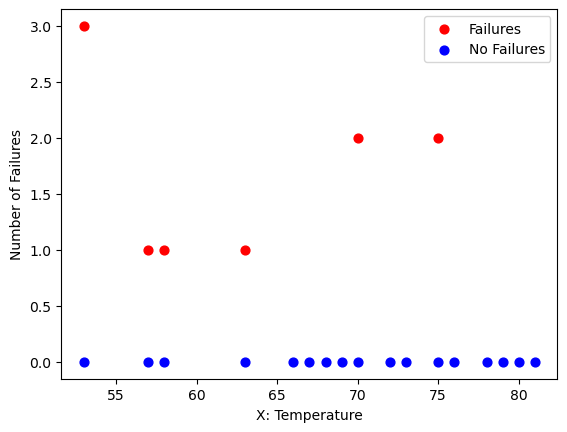

In [20]:
# Matplotlib library for plotting

# Subset the data
failures = data.loc[(data.Y == 1)]
no_failures	= data.loc[(data.Y == 0)]

# Frequencies
failures_freq = failures.X.value_counts() #failures.groupby('X')
no_failures_freq = no_failures.X.value_counts()

# Scatter Plot
import matplotlib as mpl
from matplotlib	import pyplot as plt
plt.scatter(failures_freq.index, failures_freq, c='red', s=40)
plt.scatter(no_failures_freq.index, np.zeros(len(no_failures_freq)), c='blue', s=40)
plt.xlabel('X: Temperature')
plt.ylabel('Number of Failures')
plt.legend(['Failures', 'No Failures'])
plt.show()

The red points are the data for the 7 launches for which failure in O-rings did occur. (There were 2 launches at 70 F for which 2 failures occured, and hence only 6 red points are visible). Viewing only the plot with red points appears to hint that there is no significant relationship between the temperature and O-ring failure, given that the failures have not exclusively occured at lower temperatures. However, this analysis ignores valuable informationavailable from the 18 other launches where no failures occured. 

Now, looking at the complete plot, the marks in blue show launches where no O-ring failures were detected. The picture now appreas quite different. It is clear that higher temperatures tend to result in safer launches while there is a skew towards lower temperatures of O-ring failures. 

This complete analysis could have provided a deeper insight to the NASA team as to weather to go ahead with the launch on the morning of January 28th. In fact, in the aftermath of the disaster, one of the reccomendations of the investigation commision was to include a statistician in the control team. 


As a good statistician, we should know that while a scatter plot does visually depict a relationship between temperatures and number of failures, it should not be the sole reason to make a complete decision. 

### **Logistic Regression**
This problem involves a binary classification - FAILURE vs NO FAILURE, and so a Logistic Regression might come in handy to establich a relationship between the dependent and independent variables, and help detect the probability of failure given the cold temperature on the morning of Januray 28th, 1986. 

For each launch, there are **5 independent data points for each of the 5 O-rings**. Out of the 120 data points, there are 10 failures, and 110 no failures. 

We are interested in an O-ring failure (Y=1), given the lowest temperature on January 28th, 1986. The temperature on that morning was 36 F.

By using the logistic regression equation, the probability that Y=1 when X=36 given by the logistic regression equation is

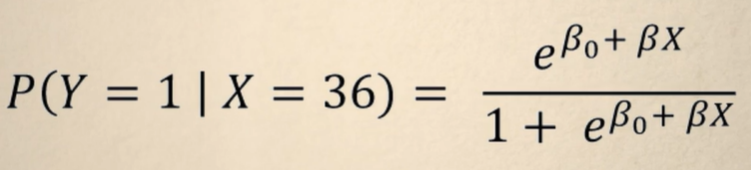

To determine this probability, we need to use logistic regression to determine the co-efficients B0 and B using the 120 data points from past launches. 

In [21]:
# Import statsmodels
import statsmodels.formula.api as SM

# Build the model
model = SM.logit(formula='Y~X',data=data)
result = model.fit()

# Summarize the model
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.242411
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                  120
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                            1
Date:                Sat, 15 Apr 2023   Pseudo R-squ.:                  0.1549
Time:                        12:48:59   Log-Likelihood:                -29.089
converged:                       True   LL-Null:                       -34.420
Covariance Type:            nonrobust   LLR p-value:                  0.001094
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4049      3.041      2.435      0.015       1.445      13.365
X             -0.1466      0.

We are most interested in the coefficients B0 and B. At 95% significance level, the confidence interval for B is (-0.2, -0.05), which does not include 0. This implies that the **co-efficient for B is significant**. The p-value for this co-efficient is 0.002, which is less that 0.05, and confers the same information about the significance of the coefficient. 

So, with 95% confidence, temperature DOES impact the likelihood of O-ring failure. The - sign of the coef tells us that temperature and O-ring failures are inversely proportional. The Negative coefficient for X determines if the temperature lowers by 1 F, there is ~15% chance for o-ring failure.

**What is the probability of failure for each of the 5 O-rings on the morning of January 28th, 1986, given that the temperature was 36 F?**

The probability that one O-ring failes at 36 F is 0.89 (90%), given by the following calculation:
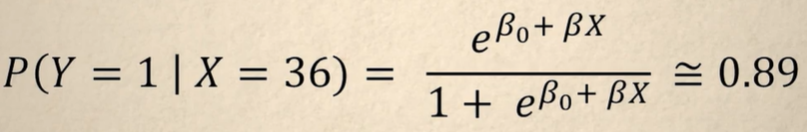


The probability of a catastrophe is (0.89)^5 = 0.57 (57%), explained by the calculation:
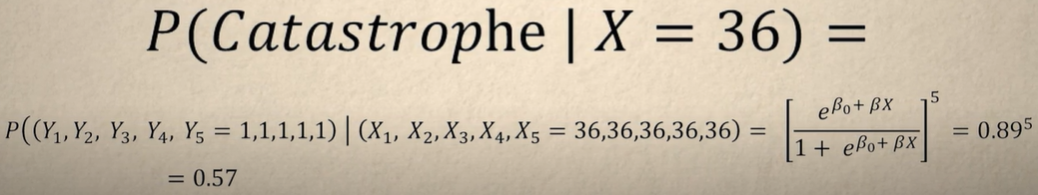

**Hence, the probability of a catastrophe on that fateful morning was as high as 57%**

This table shows the probability of failures for individual O-rings in the corresponding probability of a catastrophe at various temperatures according to our logistic regression model:
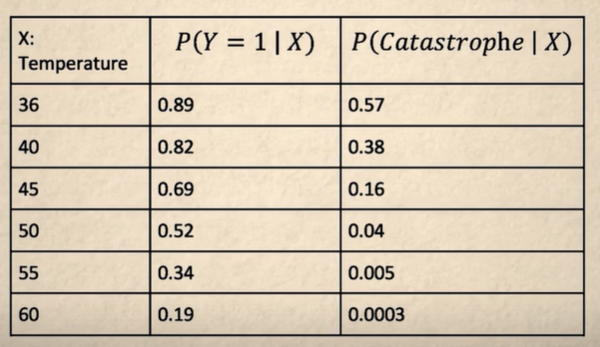

**Caution:** 
1. The model we used is very simple. It only incorporates a single independent variable. For a system as complex as a space shuttle challenger, one would need to take into account as much complexity of the real system as possible. But his arguably simple model still raises enoygh flags to stop the launch and perhaps to a far more rigorous analysis.
2. Further, there is not a single data point in the past which is close to the observed temperature on the morning of 28th January, 1986. 36 F is in a region which is significantly outside the available data from the past. We can counter this by using 55 F as a benchmark as opposed to 36 F. At 55 F, the likelihood of a single O-ring failure is 0.34, and the likelihood of a catastrophe is (0.34)^5 = 0.5%. Would you launch the Challenger at such odds, given that the actual temperature was much colder? That is the question they could have asked. 
